In [1]:
%matplotlib widget
# import matplotlib
# matplotlib.use('Agg')
from pathlib import Path
from typing import Union

import SimpleITK as sitk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
import os
from os.path import join

from nnunet.training.model_restore import load_model_and_checkpoint_files
import torch

plt.figure(figsize=(1,1))
plt.imshow(np.eye(3))
plt.show()



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



In [2]:
DATASET_NAME = 'Task208_ONKOI-bothM-curatedFinal-MR-denoise'

# MODEL_NAME = 'nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2__nnUNetPlansv2.1'
# checkpoint_name='model_final_checkpoint'

# MODEL_NAME = 'nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2MR__nnUNetPlansv2.1'
# checkpoint_name='model_best'

# MODEL_NAME = 'nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2_instnorm__nnUNetPlansv2.1'
# checkpoint_name='model_best'

# MODEL_NAME = 'nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2_freeze-CT__nnUNetPlansv2.1'
# checkpoint_name='model_final_checkpoint'

# MODEL_NAME = 'nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2_blockModal0_freeze-CT__nnUNetPlansv2.1'
# checkpoint_name='model_final_checkpoint'

MODEL_NAME = 'nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2_blockModal0_freezeCT_normalTraining__nnUNetPlansv2.1'
checkpoint_name='model_best'

model = f'/storage/nnUnet/nnUNet_trained_models/nnUNet/3d_fullres/{DATASET_NAME}/{MODEL_NAME}'
trainer, all_params = load_model_and_checkpoint_files(
        model, folds=['all'], mixed_precision=True, checkpoint_name=checkpoint_name
    )

competitions_with_custom_Trainers True
BraTS2020 True
nnUNetTrainerV2BraTSRegions False
nnUNetTrainerV2BraTSRegions_moreDA False
MMS True
nnUNetTrainerV2_MMS False
network_trainer False
nnUNetTrainer False
nnUNetTrainerCascadeFullRes False
nnUNetTrainerV2 False
nnUNetTrainerV2_CascadeFullRes False
nnUNetTrainerV2_DDP False
nnUNetTrainerV2_DP False
nnUNetTrainerV2_fp32 False
nnUNet_variants True
architectural_variants True
2023-02-03 20:29:12.189357: Using dummy2d data augmentation
rotation_x (-1.5707963267948966, 1.5707963267948966)
using the following model files:  ['/storage/nnUnet/nnUNet_trained_models/nnUNet/3d_fullres/Task208_ONKOI-bothM-curatedFinal-MR-denoise/nnUNetTrainerV2_DPnoMirroringAxis2redRot_dualPath_sep2_blockModal0_freezeCT_normalTraining__nnUNetPlansv2.1/all/model_best.model']


In [3]:
trainer.load_checkpoint_ram(all_params[0], False)

In [4]:
state_dict = all_params[0]['state_dict']
state_dict_keys = sorted(list(state_dict.keys()))
for i in state_dict_keys:
    print(i)

module.conv_blocks_context.0.blocks1.0.conv.bias
module.conv_blocks_context.0.blocks1.0.conv.weight
module.conv_blocks_context.0.blocks1.0.instnorm.bias
module.conv_blocks_context.0.blocks1.0.instnorm.weight
module.conv_blocks_context.0.blocks1.1.conv.bias
module.conv_blocks_context.0.blocks1.1.conv.weight
module.conv_blocks_context.0.blocks1.1.instnorm.bias
module.conv_blocks_context.0.blocks1.1.instnorm.weight
module.conv_blocks_context.0.blocks2.0.conv.bias
module.conv_blocks_context.0.blocks2.0.conv.weight
module.conv_blocks_context.0.blocks2.0.instnorm.bias
module.conv_blocks_context.0.blocks2.0.instnorm.weight
module.conv_blocks_context.0.blocks2.1.conv.bias
module.conv_blocks_context.0.blocks2.1.conv.weight
module.conv_blocks_context.0.blocks2.1.instnorm.bias
module.conv_blocks_context.0.blocks2.1.instnorm.weight
module.conv_blocks_context.1.blocks1.0.conv.bias
module.conv_blocks_context.1.blocks1.0.conv.weight
module.conv_blocks_context.1.blocks1.0.instnorm.bias
module.conv_blo

In [5]:
_list = [
    state_dict['module.conv_blocks_context.0.blocks1.0.conv.weight'].numpy().flatten(), 
    state_dict['module.conv_blocks_context.0.blocks2.0.conv.weight'].numpy().flatten()
]
vector_names=['1st_CT_conv', 'first_MR_conv']

In [6]:
idx = []
for k in range(0, 32, 16):
    for i in range(8):
        idx.append(np.array([k,k+8]) + i)
idx

[array([0, 8]),
 array([1, 9]),
 array([ 2, 10]),
 array([ 3, 11]),
 array([ 4, 12]),
 array([ 5, 13]),
 array([ 6, 14]),
 array([ 7, 15]),
 array([16, 24]),
 array([17, 25]),
 array([18, 26]),
 array([19, 27]),
 array([20, 28]),
 array([21, 29]),
 array([22, 30]),
 array([23, 31])]

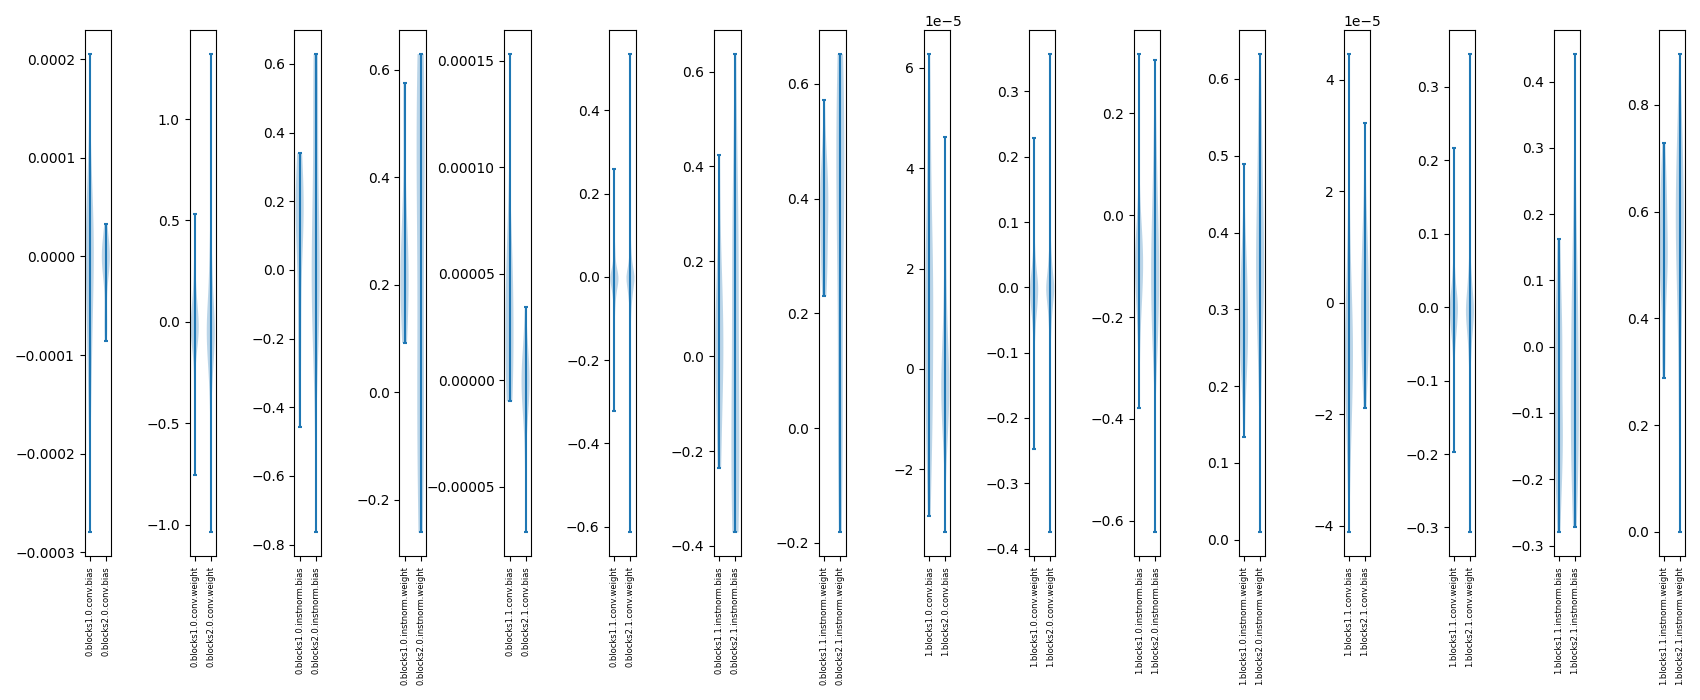

In [7]:
%matplotlib widget
tmp_keys = state_dict_keys[:32]
_list = [
    state_dict[k].numpy().flatten() for k in tmp_keys
]

fig, axes = plt.subplots(1, 16, figsize=(17, 7))
for enum, ax in enumerate(axes.flatten()):
    ax.violinplot([_list[i] for i in idx[enum]])
    ax.set_xticks([1, 2], [tmp_keys[i].replace('module.conv_blocks_context.', '') for i in idx[enum]], rotation=90, fontsize=6)
fig.tight_layout(w_pad=0.02)

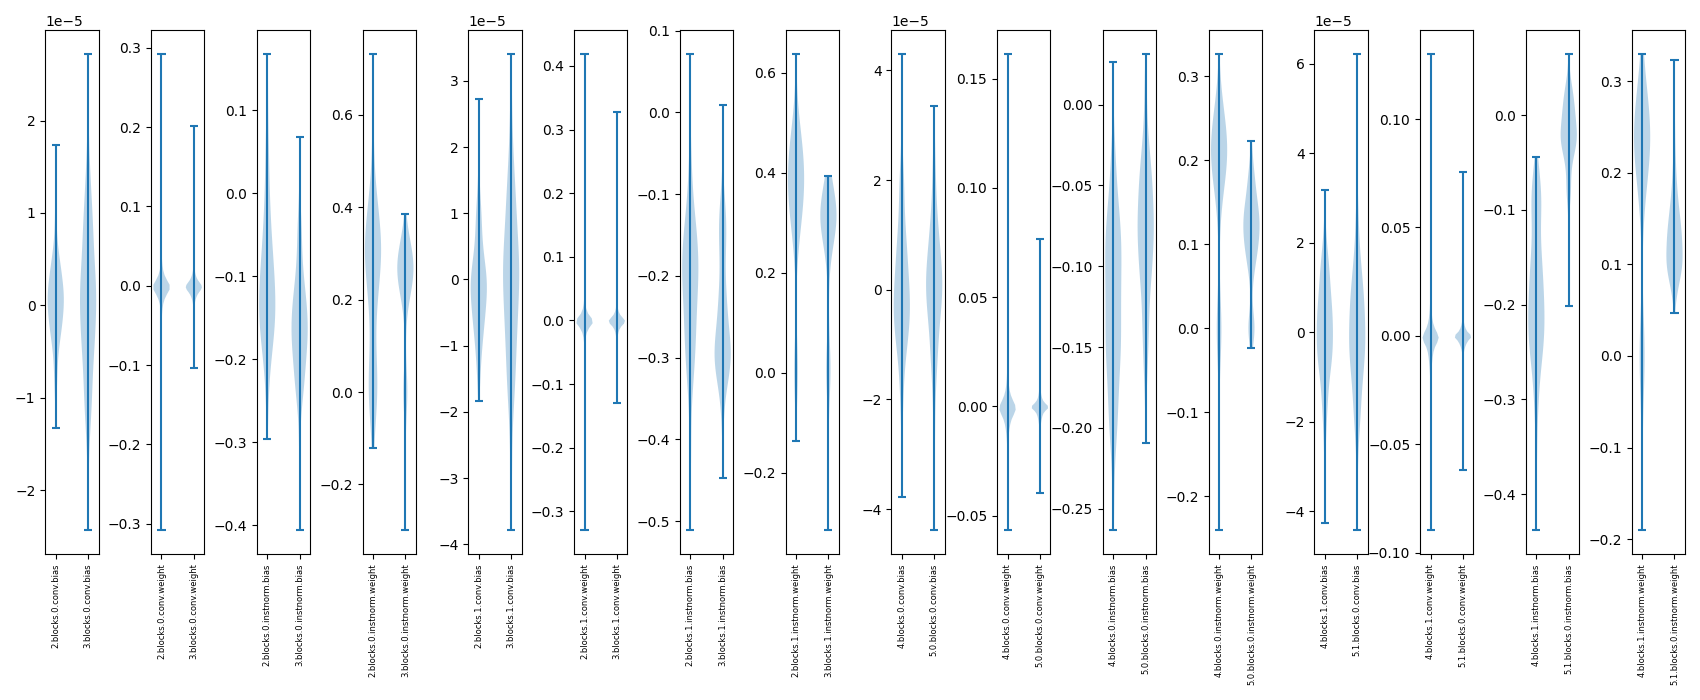

In [8]:
tmp_keys = state_dict_keys[32:64]
_list = [
    state_dict[k].numpy().flatten() for k in tmp_keys
]
fig, axes = plt.subplots(1, 16, figsize=(17, 7))
for enum, ax in enumerate(axes.flatten()):
    ax.violinplot([_list[i] for i in idx[enum]])
    ax.set_xticks([1, 2], [tmp_keys[i].replace('module.conv_blocks_context.', '') for i in idx[enum]], rotation=90, fontsize=6)
fig.tight_layout(w_pad=0.02)

(128, 64, 3, 3, 3)


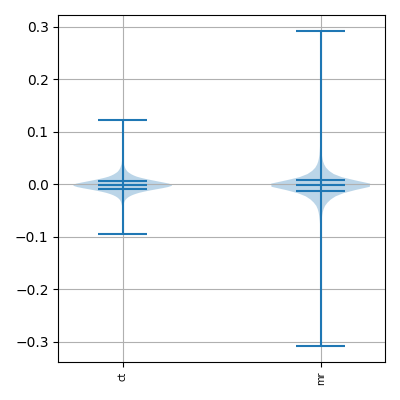

In [9]:
w = state_dict['module.conv_blocks_context.2.blocks.0.conv.weight'].numpy()
print(w.shape)
_list = [w[:,:32].flatten(), w[:,32:].flatten()]
# _list = [w[:64,:].flatten(), w[64:,:].flatten()]
vector_names = ['ct', 'mr']
plt.figure(figsize=(4, 4))
plt.violinplot(_list, showmeans=True, quantiles=[[0.25, 0.75], [0.25, 0.75]])
plt.xticks(np.arange(len(_list))+1, vector_names)
plt.xticks(rotation=90, fontsize=7)
plt.grid()
plt.tight_layout()
plt.show()

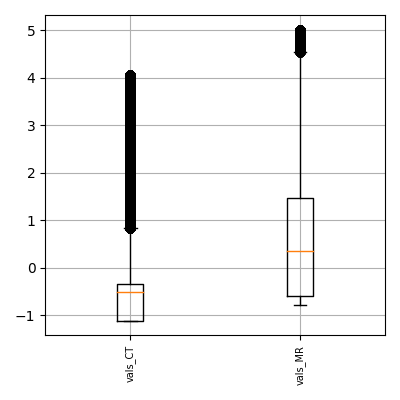

In [10]:
ct_fp = '/media/medical/projects/head_and_neck/nnUnet/Task208_ONKOI-bothM-curatedFinal-MR-denoise/ct_patch_sitk43.nii.gz'
ct_img = sitk.GetArrayFromImage(sitk.ReadImage(ct_fp))
mr_img = sitk.GetArrayFromImage(sitk.ReadImage(ct_fp.replace('ct_', 'mr_')))

vector_names=['vals_CT', 'vals_MR']
_list = [
    ct_img.flatten(), mr_img.flatten()
]
plt.figure(figsize=(4, 4))
plt.boxplot(_list)
plt.xticks(np.arange(len(_list))+1, vector_names)
plt.xticks(rotation=90, fontsize=7)
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
convw = {}

In [12]:
IMG_BASE_DIR= f'/media/medical/projects/head_and_neck/nnUnet/{DATASET_NAME}/{MODEL_NAME}'
def plot_activations(activation, actv_name, vmin, vmax, modalityblocked, slc = 28, img_base_dir=IMG_BASE_DIR, show=True):
    os.makedirs(img_base_dir, exist_ok=True)
    actv = activation[actv_name]
    num_filters = actv.shape[1]
    
    ncols_options = 2**np.arange(6)
    n_cols_and_rows = ncols_options[np.abs(ncols_options - np.sqrt(num_filters)).argmin()]
    n_cols_and_rows = [n_cols_and_rows, num_filters//n_cols_and_rows]
    ncols = max(n_cols_and_rows)
    nrows = min(n_cols_and_rows)
    
    fig_k = 1 if num_filters > 100 else 2
    figsize=(ncols*fig_k, nrows*fig_k)

    plt.close('all')
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for enum, ax in enumerate(axes.flatten()):
        ax.imshow(actv[0,enum,slc], cmap='gray', vmin=vmin, vmax=vmax)
        
    plt.suptitle(actv_name + ' ' + str(actv.shape) + f' DISPLAY vmin={vmin}, vmax={vmax}')
    plt.tight_layout()
    if show:
        plt.show()
    plt.savefig(join(img_base_dir, f'slc-{slc}_{actv_name}_BLOCKED-{modalityblocked}.png'))
    if not show:
        plt.close('all')
        
def get_percentiles(a):
    vmin = np.percentile(a.flatten(), 1)
    vmax = np.percentile(a.flatten(), 99)
    return vmin, vmax

def plot_boxplot_activations(activation, actv_names, modalityblocked, img_base_dir=IMG_BASE_DIR, ylim=None):
    _list = [activation[a].flatten() for a in actv_names]
    ylimstr = ''
    if ylim is not None:
        _list = [np.clip(i, *ylim) for i in _list]
        ylimstr = 'clipped'
    plt.figure(figsize=(4, 10))
    plt.violinplot(_list)
    plt.xticks(np.arange(len(_list))+1, actv_names)
    plt.xticks(rotation=90, fontsize=7)
    plt.grid()
    
    
    plt.tight_layout()
    plt.show()
    plt.savefig(join(img_base_dir, f'{"--".join(actv_names)}_BLOCKED-{modalityblocked}_{ylimstr}.png'))

In [51]:
SLC = 28
SHOW=False

modalityblocked = 'ct'
data = np.stack((ct_img*0, mr_img))[np.newaxis]
print(mr_img.shape, data.shape)
data_torch = torch.from_numpy(data).float().to(device='cuda:0')

(40, 192, 192) (1, 2, 40, 192, 192)


In [52]:
from torch.cuda.amp import autocast
trainer.network.to(device='cuda:0')
trainer.network.eval()

with autocast():
    with torch.no_grad():
        a = trainer.network(data_torch)
print(a[0].shape)

torch.Size([1, 31, 40, 192, 192])


In [53]:
trainer.network.conv_blocks_localization[3]

Sequential(
  (0): StackedConvLayers(
    (blocks): Sequential(
      (0): ConvDropoutNormNonlin(
        (conv): Conv3d(128, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (instnorm): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (lrelu): LeakyReLU(negative_slope=0.01, inplace=True)
      )
    )
  )
  (1): StackedConvLayers(
    (blocks): Sequential(
      (0): ConvDropoutNormNonlin(
        (conv): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (instnorm): InstanceNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (lrelu): LeakyReLU(negative_slope=0.01, inplace=True)
      )
    )
  )
)

In [10]:
def get_attr_or_element(base, _list):
    for e, l in enumerate(_list):
        if isinstance(l, int):
            base = base[l]
        else:
            base = getattr(base, l)
        return get_attr_or_element(base, _list[e+1:])
    return base
get_attr_or_element(trainer.network, ['conv_blocks_context', 0, 'blocks1', 0, '.conv'])

NameError: name 'trainer' is not defined

In [54]:

activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach().cpu().numpy()
    return hook
trainer.network.to(device='cuda:0')
trainer.network.eval()
model = trainer.network
with autocast():
    with torch.no_grad():
        trainer.network.conv_blocks_context[0].blocks1[0].conv.register_forward_hook(get_activation('output of 1st conv in the 1st block of CT path'))
        trainer.network.conv_blocks_context[0].blocks2[0].conv.register_forward_hook(get_activation('output of 1st conv in the 1st block of MR path'))
        
        trainer.network.conv_blocks_context[0].blocks1[1].conv.register_forward_hook(get_activation('output of 2nd conv in the 1st block of CT path'))
        trainer.network.conv_blocks_context[0].blocks2[1].conv.register_forward_hook(get_activation('output of 2nd conv in the 1st block of MR path'))
        
        trainer.network.conv_blocks_context[1].blocks1[0].conv.register_forward_hook(get_activation('output of 1st conv in the 2nd block of CT path'))
        trainer.network.conv_blocks_context[1].blocks2[0].conv.register_forward_hook(get_activation('output of 1st conv in the 2nd block of MR path'))
        
        trainer.network.conv_blocks_context[1].blocks1[1].conv.register_forward_hook(get_activation('output of 2nd conv in the 2nd block of CT path'))
        trainer.network.conv_blocks_context[1].blocks2[1].conv.register_forward_hook(get_activation('output of 2nd conv in the 2nd block of MR path'))
        
        trainer.network.conv_blocks_context[1].blocks1[1].lrelu.register_forward_hook(get_activation('output of 2nd LReLU in the 2nd block of CT path'))
        trainer.network.conv_blocks_context[1].blocks2[1].lrelu.register_forward_hook(get_activation('output of 2nd LReLU in the 2nd block of MR path'))
        
        trainer.network.conv_blocks_context[2].blocks[0].conv.register_forward_hook(get_activation('output of 1st conv in the 3rd block'))
        
        trainer.network.conv_blocks_context[2].blocks[1].lrelu.register_forward_hook(get_activation('output of 2nd LReLU in the 3rd block'))
        
        trainer.network.conv_blocks_context[3].blocks[1].lrelu.register_forward_hook(get_activation('output of 2nd LReLU in the 4th block'))
        
        trainer.network.conv_blocks_localization[3][1].blocks[0].lrelu.register_forward_hook(get_activation('output of 2nd LReLU in the 4th loc block'))
        
        trainer.network.conv_blocks_localization[2][1].blocks[0].lrelu.register_forward_hook(get_activation('output of 3rd loc block'))
        
        trainer.network.conv_blocks_localization[3][0].blocks[0].conv.register_forward_hook(get_activation('output of first conv in 4th loc block'))
        
        trainer.network.tu[0].register_forward_hook(get_activation('output of transp conv before the 1st loc block'))
        
        trainer.network.tu[1].register_forward_hook(get_activation('output of transp conv before the 2nd loc block'))
        
        trainer.network.tu[2].register_forward_hook(get_activation('output of transp conv before the 3rd loc block'))
        
        trainer.network.tu[3].register_forward_hook(get_activation('output of transp conv before the 4th loc block'))
        
        trainer.network.tu[4].register_forward_hook(get_activation('output of transp conv before the 5th loc block'))

        output = trainer.network(data_torch)

In [55]:
for i, j in activation.items():
    print(i, j.shape)

output of 1st conv in the 1st block of CT path (1, 16, 40, 192, 192)
output of 2nd conv in the 1st block of CT path (1, 16, 40, 192, 192)
output of 1st conv in the 1st block of MR path (1, 16, 40, 192, 192)
output of 2nd conv in the 1st block of MR path (1, 16, 40, 192, 192)
output of 1st conv in the 2nd block of CT path (1, 32, 40, 96, 96)
output of 2nd conv in the 2nd block of CT path (1, 32, 40, 96, 96)
output of 2nd LReLU in the 2nd block of CT path (1, 32, 40, 96, 96)
output of 1st conv in the 2nd block of MR path (1, 32, 40, 96, 96)
output of 2nd conv in the 2nd block of MR path (1, 32, 40, 96, 96)
output of 2nd LReLU in the 2nd block of MR path (1, 32, 40, 96, 96)
output of 1st conv in the 3rd block (1, 128, 40, 48, 48)
output of 2nd LReLU in the 3rd block (1, 128, 40, 48, 48)
output of 2nd LReLU in the 4th block (1, 256, 20, 24, 24)
output of transp conv before the 1st loc block (1, 320, 10, 12, 12)
output of transp conv before the 2nd loc block (1, 256, 20, 24, 24)
output of t

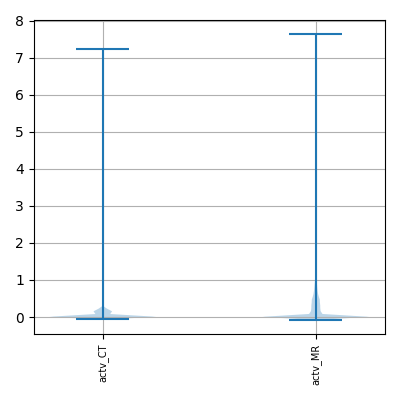

In [56]:
%matplotlib widget
vector_names=['actv_CT', 'actv_MR']
_list = [
    activation['output of 2nd LReLU in the 2nd block of CT path'][:,:,SLC].flatten(), 
    activation['output of 2nd LReLU in the 2nd block of MR path'][:,:,SLC].flatten()
]
plt.figure(figsize=(4, 4))
plt.violinplot(_list)
plt.xticks(np.arange(len(_list))+1, vector_names)
plt.xticks(rotation=90, fontsize=7)
plt.grid()
plt.tight_layout()
plt.show()

In [57]:

vmin, vmax = -0.87109375, 0.57080078125

plot_activations(activation, 'output of 2nd conv in the 2nd block of CT path', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)
plot_activations(activation, 'output of 2nd conv in the 2nd block of MR path', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)


In [58]:
vmin, vmax = -0.246826171875, 0.806640625
# vmin, vmax = -0.010528564453125, 0.806640625
plot_activations(activation, 'output of 2nd LReLU in the 2nd block of CT path', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)
plot_activations(activation, 'output of 2nd LReLU in the 2nd block of MR path', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)

# vmin, vmax = -0.246826171875, 0.2337646484375
plot_activations(activation, 'output of transp conv before the 4th loc block', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)

In [59]:
# convw[modalityblocked] = activation['output of 1st conv in the 3rd block']
# vector_names=['actv_CT', 'actv_MR']
# actvskupna = activation['output of 1st conv in the 3rd block']
# actvskupna.shape

In [60]:
# plt.figure(figsize=(4, 4))
# plt.violinplot([j.flatten() for i, j in convw.items()])
# plt.xticks(np.arange(3)+1, [i for i, j in convw.items()])
# plt.xticks(rotation=90, fontsize=7)
# plt.grid()
# plt.tight_layout()
# plt.show()
# plt.savefig(f'/media/medical/projects/head_and_neck/nnUnet/Task208_ONKOI-bothM-curatedFinal-MR-denoise/activations_joint_after_1st_conv_block3down_comparison.png')

In [61]:
vmin, vmax = -1.5, 0.96
plot_activations(activation, 'output of 1st conv in the 3rd block', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)

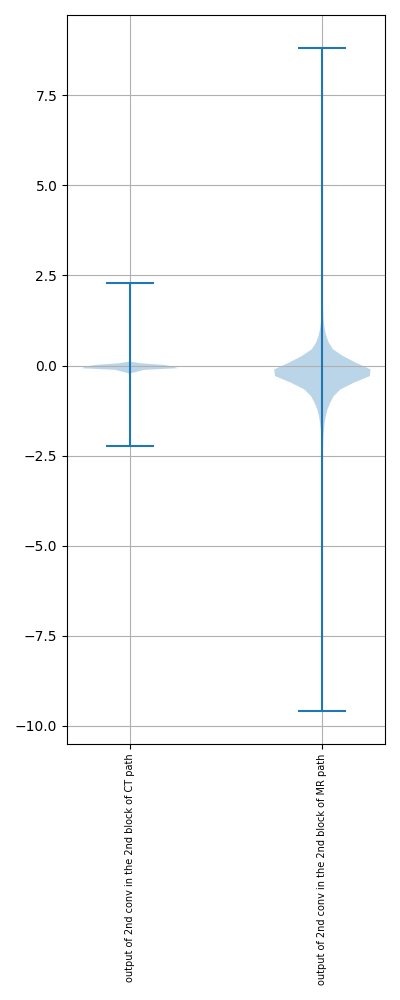

In [62]:
%matplotlib widget
plot_boxplot_activations(activation, ['output of 2nd conv in the 2nd block of CT path', 'output of 2nd conv in the 2nd block of MR path'], modalityblocked, img_base_dir=IMG_BASE_DIR)

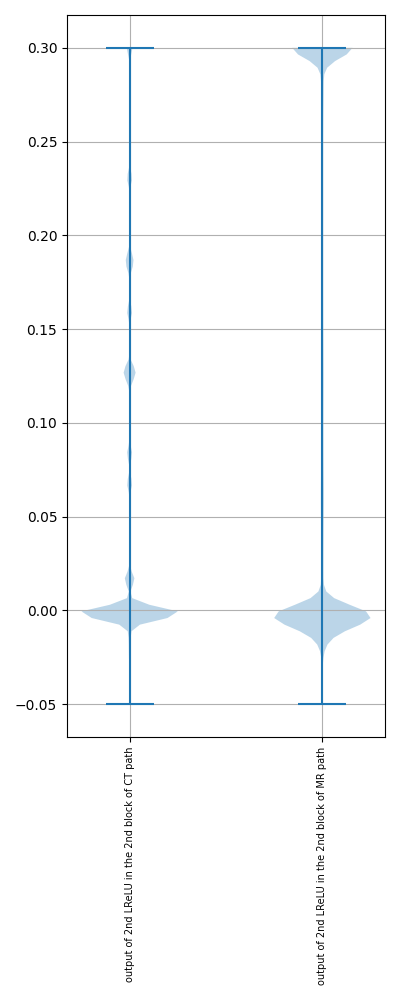

In [63]:
# plot_boxplot_activations(activation, ['output of 2nd LReLU in the 2nd block of CT path', 'output of 2nd LReLU in the 2nd block of MR path'], modalityblocked, img_base_dir=IMG_BASE_DIR)
plot_boxplot_activations(activation, ['output of 2nd LReLU in the 2nd block of CT path', 'output of 2nd LReLU in the 2nd block of MR path'], modalityblocked, img_base_dir=IMG_BASE_DIR, ylim=(-0.05, 0.3))

In [64]:
vmin, vmax = -0.00824737548828125, 0.3115234375
plot_activations(activation, 'output of 2nd LReLU in the 4th block', vmin=vmin, vmax=vmax, slc=SLC//2, modalityblocked=modalityblocked, show=SHOW)

In [65]:
vmin, vmax = -0.0159149169921875, 3.5
plot_activations(activation, 'output of 2nd LReLU in the 4th loc block', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)

In [66]:
vmin, vmax = -0.246826171875, 0.2337646484375
plot_activations(activation, 'output of transp conv before the 3rd loc block', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)

In [67]:
vmin, vmax=-1.12890625, 1.2265625
plot_activations(activation, 'output of transp conv before the 5th loc block', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)

In [68]:
# n = plt.imread('/media/medical/projects/head_and_neck/nnUnet/Task208_ONKOI-bothM-curatedFinal-MR-denoise/joint_after_1st_conv_block3down_none.png')[:,:,:3].astype(float)
# ct0 = plt.imread('/media/medical/projects/head_and_neck/nnUnet/Task208_ONKOI-bothM-curatedFinal-MR-denoise/joint_after_1st_conv_block3down_ct0.png')[:,:,:3].astype(float)
# mr0 = plt.imread('/media/medical/projects/head_and_neck/nnUnet/Task208_ONKOI-bothM-curatedFinal-MR-denoise/joint_after_1st_conv_block3down_mr0.png')[:,:,:3].astype(float)
# def normalize(img):
#     img = img.astype(float)
#     img += 1
#     img /= 2
#     return img
    
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# axes[0].imshow(normalize(n-ct0), vmin=0, vmax=1)
# axes[0].set_title('ALL - CT_zero features')
# axes[1].imshow(normalize(n-mr0), vmin=0, vmax=1)
# axes[1].set_title('ALL - MR_zero features')

In [69]:
# get_percentiles(activation['output of first conv in 4th loc block'])

vmin, vmax=-2.29296875, 0.79150390625
plot_activations(activation, 'output of first conv in 4th loc block', vmin=vmin, vmax=vmax, slc=SLC, modalityblocked=modalityblocked, show=SHOW)